In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Data

## Import

In [2]:
dataset = pd.read_csv('Mall_Customers.csv')
dataset.sample(5)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
198,199,Male,32,137,18
115,116,Female,19,65,50
121,122,Female,38,67,40
12,13,Female,58,20,15
187,188,Male,28,101,68


In [3]:
dataset.describe(include='all')

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200,200.000000,200.000000,200.000000
unique,NaN,2,NaN,NaN,NaN
top,NaN,Female,NaN,NaN,NaN
freq,NaN,112,NaN,NaN,NaN
mean,100.500000,NaN,38.850000,60.560000,50.200000
std,57.879185,NaN,13.969007,26.264721,25.823522
min,1.000000,NaN,18.000000,15.000000,1.000000
25%,50.750000,NaN,28.750000,41.500000,34.750000
50%,100.500000,NaN,36.000000,61.500000,50.000000
75%,150.250000,NaN,49.000000,78.000000,73.000000


In [4]:
X = dataset.iloc[:,[3,4]].values
X.shape

(200, 2)

## Missing Data

In [5]:
dataset.isna().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

# Clustering

## Dendogram

In [6]:
from scipy.cluster import hierarchy as sch

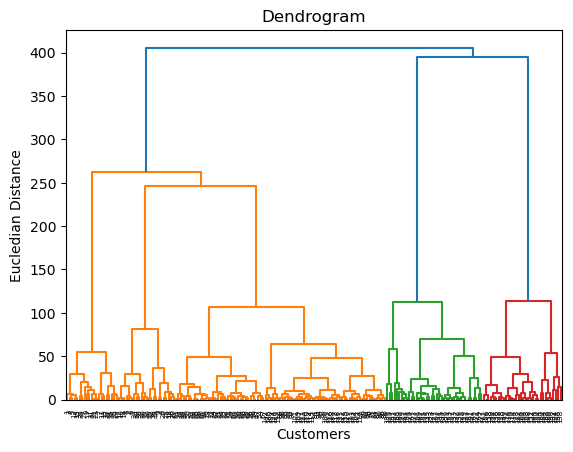

In [7]:
dendrogram = sch.dendrogram(sch.linkage(X,method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Eucledian Distance');

## Training & Predicting

In [9]:
from sklearn.cluster import AgglomerativeClustering

In [10]:
hc = AgglomerativeClustering(n_clusters=5,metric='euclidean',linkage='ward')
y = hc.fit_predict(X)
y.shape

(200,)

## Visualising 

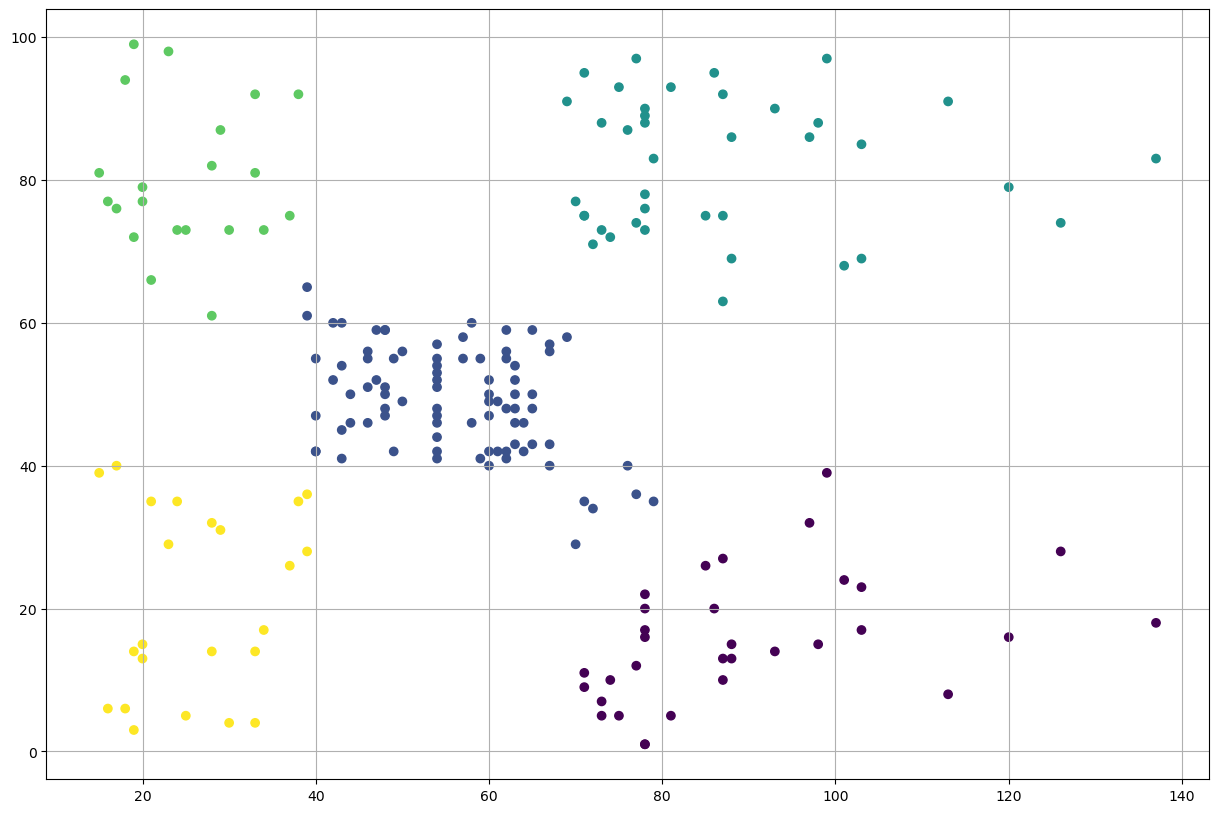

In [16]:
plt.figure(figsize=(15,10))
plt.scatter(X[:,0],X[:,1],c=y,cmap='viridis')
plt.grid()

In [17]:
dataset['cluster'] = y

In [18]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
 5   cluster                 200 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 9.5+ KB


In [19]:
dataset.pivot_table(values=['Age','Annual Income (k$)','Spending Score (1-100)'],
                    index=['cluster'],aggfunc=['median','max','min','mean'])

median                                           max  \
           Age Annual Income (k$) Spending Score (1-100) Age   
cluster                                                        
0         41.5               86.5                   15.0  59   
1         46.0               57.0                   49.0  70   
2         32.0               79.0                   83.0  40   
3         23.0               24.0                   77.0  35   
4         46.0               25.0                   17.0  67   

                                                  min                     \
        Annual Income (k$) Spending Score (1-100) Age Annual Income (k$)   
cluster                                                                    
0                      137                     39  19                 71   
1                       79                     65  18                 39   
2                      137                     97  27                 69   
3                       38                     99  18                 15   
4                       39                     40  19                 15   

                                     mean                     \
        Spending Score (1-100)        Age Annual Income (k$)   
cluster                                                        
0                            1  41.000000          89.406250   
1                           29  42.482353          55.811765   
2                           63  32.692308          86.538462   
3                           61  25.333333          25.095238   
4                            3  45.217391          26.304348   

                                
        Spending Score (1-100)  
cluster                         
0                    15.593750  
1                    49.129412  
2                    82.128205  
3                    80.047619  
4                    20.913043

In [20]:
genre_summ = dataset.groupby(['cluster','Genre']).count()[['CustomerID']].unstack(level=1)['CustomerID']
genre_summ['Prop Fem'] = genre_summ['Female']/genre_summ.sum(axis=1)
genre_summ

Genre,Female,Male,Prop Fem
cluster,,,
0,14,18,0.437500
1,51,34,0.600000
2,21,18,0.538462
3,12,9,0.571429
4,14,9,0.608696
